In [95]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as skm

In [2]:
data = pd.read_csv('yelp_labelled.txt', delimiter= '\t', header=None)
data.columns = ['review', 'positive']

In [3]:
data.head(50);
data['review'] = data['review'].str.lower()

In [4]:
punc2 = [",","!",".",";","?"]

In [5]:
for item in punc2:
    data['review'] = data['review'].str.replace('item','')

In [6]:
data['review'] = data['review'].str.replace(',','')
data['review'] = data['review'].str.replace('!','')
data['review'] = data['review'].str.replace('.','')

In [7]:
pos_words = ['love', 'loved', 'great', 'best', 'amazing']

In [8]:
bad_words = ['damn','stupid']

In [46]:
neg_words = ['poor', 'horrible','terrible','bad'
             ,'mean','nasty','not']

In [47]:
def add_columns(list, data):
    for word in list:
        data[str(word)] = data.review.str.contains(str(word)+' ')

In [48]:
def add_columns_nospace(list, data):
    for word in list:
        data[str(word)] = data.review.str.contains(str(word))

In [49]:
add_columns(pos_words, data)
add_columns(neg_words, data)
add_columns(bad_words, data)

In [50]:
#data['positive'] = (data['positive'] == 1)

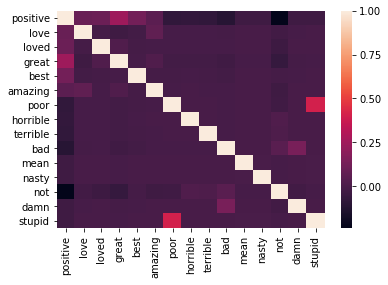

In [51]:
sns.heatmap(data.corr())

In [15]:
#Potential items to remove: fuck, bitch, cunt, shit, asshole, hell, piss, horrid, gross

In [52]:
items = data[pos_words+ neg_words+ bad_words]
target = data['positive']

In [53]:
from sklearn.naive_bayes import BernoulliNB

def bern_predict(item, targett):
    bnb = BernoulliNB()
    bnb.fit(item, targett)
    y_pred = bnb.predict(item)

    # Display our results.
    print("Number of mislabeled points out of a total {} points : {}".format(
    item.shape[0],
    (targett != y_pred).sum()
    ))
    return y_pred

In [54]:
bern_predict(items, target);

Number of mislabeled points out of a total 1000 points : 395


In [55]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
y_pred = mnb.fit(items, target).predict(items)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    items.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 401


In [56]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(items, target).predict(items)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    items.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 468


In [22]:
#Definitely sticking with the Bernoulli model, but we are not looking too 
#hot w/ prediction.
#Let's remove some of those interacting words
# Keeping: 'shit', 'horrid', 'gross'
#data = data.drop(columns = ['fuck', 'bitch', 'cunt', 'asshole', 'hell', 'piss'])

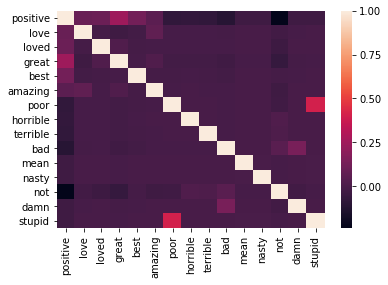

In [57]:
#Still looks like they might be worth dropping
sns.heatmap(data.corr())

In [58]:
items2 = data[pos_words+ ['damn', 'stupid'] + neg_words]

In [59]:
bern_predict(items2, target);

Number of mislabeled points out of a total 1000 points : 395


In [27]:
#Didn't get worse, but didn't get better either, let's kill the other values
#data = data.drop(columns=['horrid','gross'])

In [39]:
#neg_words.remove('horrid')
#neg_words.remove('gross')

ValueError: list.remove(x): x not in list

In [60]:
item3 = data[pos_words+ ['damn','stupid'] + neg_words]

In [61]:
y3_pred = bern_predict(item3, target)

Number of mislabeled points out of a total 1000 points : 395


In [62]:
data.loc[data['positive'] != y3_pred, ['review','positive']];

In [63]:
x1 = bern_predict(item3, target)

Number of mislabeled points out of a total 1000 points : 395


In [64]:
item4 = data[pos_words+bad_words+neg_words]
x2 = bern_predict(item4, target)

Number of mislabeled points out of a total 1000 points : 395


In [65]:
data.head();

In [66]:
#Only increase by 2 rows, we can do better than that!
negation = ['not', 'no',"n't"]
feeling = ['hate','underwhelmed','impressed','wasted', 'great']

In [67]:
add_columns_nospace(negation, data)
add_columns(feeling, data)

In [68]:
item5 = data[pos_words+bad_words+neg_words+negation+feeling]
x3 = bern_predict(item5, target)

Number of mislabeled points out of a total 1000 points : 325


In [69]:
taste = ['rubber','tar','heaven','delicious','burnt','wonderful','blah','meh',
        'appalling', 'bland', 'dry']
extreme = ['best', 'worst','never','always','old','new']

In [70]:
add_columns_nospace(taste, data)
add_columns_nospace(extreme, data)

In [71]:
item6 = data[pos_words+bad_words+neg_words+negation+feeling+taste+extreme]
target = data['positive']
x4=bern_predict(item6, target)

Number of mislabeled points out of a total 1000 points : 278


In [72]:
service = ['speedy','quick','slow','lazy', 'fantastic', 'mediocre', 'spotty','average'
          ,'rude', 'disappoint']
rating = ['thumbs down', 'thumb down', 'thumbs up','five stars', 'no stars']

In [73]:
add_columns_nospace(service, data)
add_columns_nospace(rating, data)

In [74]:
attributes = pos_words+bad_words+neg_words+negation+feeling+taste+extreme+service+rating

In [75]:
item7 = data[attributes]
target = data['positive']
x5=bern_predict(item7, target)

Number of mislabeled points out of a total 1000 points : 240


In [76]:
data.loc[data['positive'] != x5, ['review','positive']]

,review,positive
14,i was disgusted because i was pretty sure that...,False
28,took an hour to get our food only 4 tables in ...,False
31,this was like the final blow,False
32,i found this place by accident and i could not...,True
33,seems like a good quick place to grab a bite o...,False
39,service sucks,False
56,the heart attack grill in downtown vegas is an...,False
58,the salad had just the right amount of sauce t...,True
60,at least think to refill my water before i str...,False
79,there is so much good food in vegas that i fee...,False


In [80]:
data_imdb = pd.read_csv('imdb_labelled.txt', delimiter= '\t', header=None)
data_imdb.columns = ['review', 'positive']

In [84]:
data_imdb_test = data_imdb[attributes]
target_imdb = data_imdb['positive']

In [85]:
print(len(data_imdb))
print(len(data_imdb_test))
print(len(target_imdb))

748
748
748


In [83]:
for a in [pos_words,bad_words,neg_words,negation,feeling,taste,extreme
             ,service,rating]:
    add_columns_nospace(a, data_imdb)

In [86]:
y1 = bern_predict(data_imdb_test, target_imdb)

Number of mislabeled points out of a total 748 points : 223


In [87]:
data_amazon = pd.read_csv('amazon_cells_labelled.txt', delimiter= '\t', header=None)
data_amazon.columns=['review','positive']

In [88]:
data_amazon.head()

,review,positive
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [89]:
for a in [pos_words,bad_words,neg_words,negation,feeling,taste,extreme
             ,service,rating]:
    add_columns_nospace(a, data_amazon)

In [90]:
data_ama_test = data_amazon[attributes]
target_ama = data_amazon['positive']

In [91]:
z1 = bern_predict(data_ama_test, target_ama)

Number of mislabeled points out of a total 1000 points : 326


In [92]:
(1000-240)/1000

0.76

In [96]:
skm.accuracy_score(target, x5)

0.76

In [99]:
from sklearn.model_selection import cross_val_score
bnb = BernoulliNB()


yelp_scores = cross_val_score(bnb, item7 ,target, cv=5)

In [101]:
print(yelp_scores.mean())
print(yelp_scores.std())

0.7489999999999999
0.03397057550292609


In [103]:
attributes = pos_words+bad_words+neg_words+negation+feeling+taste+extreme+service+rating
attribute_array = [pos_words,bad_words,neg_words,negation,feeling,taste,extreme,service,rating]
item7 = data[attributes]
target = data['positive']
x5=bern_predict(item7, target)


Number of mislabeled points out of a total 1000 points : 240


In [104]:
print(attribute_array)
print(pos_words)

[['love', 'loved', 'great', 'best', 'amazing'], ['damn', 'stupid'], ['poor', 'horrible', 'terrible', 'bad', 'mean', 'nasty', 'not'], ['not', 'no', "n't"], ['hate', 'underwhelmed', 'impressed', 'wasted', 'great'], ['rubber', 'tar', 'heaven', 'delicious', 'burnt', 'wonderful', 'blah', 'meh', 'appalling', 'bland', 'dry'], ['best', 'worst', 'never', 'always', 'old', 'new'], ['speedy', 'quick', 'slow', 'lazy', 'fantastic', 'mediocre', 'spotty', 'average', 'rude', 'disappoint'], ['thumbs down', 'thumb down', 'thumbs up', 'five stars', 'no stars']]
['love', 'loved', 'great', 'best', 'amazing']


In [106]:
from itertools import combinations
from itertools import chain

In [109]:
print(list(combinations(attribute_array, 2)))

[(['love', 'loved', 'great', 'best', 'amazing'], ['damn', 'stupid']), (['love', 'loved', 'great', 'best', 'amazing'], ['poor', 'horrible', 'terrible', 'bad', 'mean', 'nasty', 'not']), (['love', 'loved', 'great', 'best', 'amazing'], ['not', 'no', "n't"]), (['love', 'loved', 'great', 'best', 'amazing'], ['hate', 'underwhelmed', 'impressed', 'wasted', 'great']), (['love', 'loved', 'great', 'best', 'amazing'], ['rubber', 'tar', 'heaven', 'delicious', 'burnt', 'wonderful', 'blah', 'meh', 'appalling', 'bland', 'dry']), (['love', 'loved', 'great', 'best', 'amazing'], ['best', 'worst', 'never', 'always', 'old', 'new']), (['love', 'loved', 'great', 'best', 'amazing'], ['speedy', 'quick', 'slow', 'lazy', 'fantastic', 'mediocre', 'spotty', 'average', 'rude', 'disappoint']), (['love', 'loved', 'great', 'best', 'amazing'], ['thumbs down', 'thumb down', 'thumbs up', 'five stars', 'no stars']), (['damn', 'stupid'], ['poor', 'horrible', 'terrible', 'bad', 'mean', 'nasty', 'not']), (['damn', 'stupid'],

In [129]:
target = data['positive']


def feature_score(num):
    scores = []
    attr_list = []
    for c in combinations(attribute_array, num):
        attr = list(chain.from_iterable(c))
        attr_list.append(list(chain.from_iterable(c)))
        features = data[attr]
        scores.append(cross_val_score(bnb, features, target, cv=5).mean())
    
    return max(scores), attr_list[np.argmax(scores)]

In [124]:
attr_list[np.argmax(scores)]

['not',
 'no',
 "n't",
 'speedy',
 'quick',
 'slow',
 'lazy',
 'fantastic',
 'mediocre',
 'spotty',
 'average',
 'rude',
 'disappoint']

In [130]:
feature_score(1)

(0.6489999999999999, ['not', 'no', "n't"])

In [132]:
for num in np.arange(1,10):
    print(feature_score(num))

(0.6489999999999999, ['not', 'no', "n't"])
(0.692, ['not', 'no', "n't", 'speedy', 'quick', 'slow', 'lazy', 'fantastic', 'mediocre', 'spotty', 'average', 'rude', 'disappoint'])
(0.7150000000000001, ['not', 'no', "n't", 'best', 'worst', 'never', 'always', 'old', 'new', 'speedy', 'quick', 'slow', 'lazy', 'fantastic', 'mediocre', 'spotty', 'average', 'rude', 'disappoint'])
(0.732, ['not', 'no', "n't", 'rubber', 'tar', 'heaven', 'delicious', 'burnt', 'wonderful', 'blah', 'meh', 'appalling', 'bland', 'dry', 'best', 'worst', 'never', 'always', 'old', 'new', 'speedy', 'quick', 'slow', 'lazy', 'fantastic', 'mediocre', 'spotty', 'average', 'rude', 'disappoint'])
(0.735, ['not', 'no', "n't", 'hate', 'underwhelmed', 'impressed', 'wasted', 'great', 'rubber', 'tar', 'heaven', 'delicious', 'burnt', 'wonderful', 'blah', 'meh', 'appalling', 'bland', 'dry', 'best', 'worst', 'never', 'always', 'old', 'new', 'speedy', 'quick', 'slow', 'lazy', 'fantastic', 'mediocre', 'spotty', 'average', 'rude', 'disappoi